# Validating with MERIS datasets from 2010 and 2008 match-up time window of 2 hours

In [1]:
__credits__ = ["José M. Beltrán"]
__license__ = "GPL-3.0"
__created_on__ = ["2012-05-02"]
__modified_on__ = { "2014-10-22": ["Added Turbidity_Nechad_620"]
                    "2014-10-16": ["Batch process targeting Turbidity"], 
                    "2013-10-22": ["New GPT graph. The BEAM VISAT version 4.11 does not include anymore the inputPaths whithin the graph it has changed to: &lt;sourceProductPaths&gt;"], 
                    "2013-10-17": ["reintroduced for Selima and Evgeny: - xml_skeleton,- the get_fub_srcList "], 
                    "2012-06-18": ["xml_skeletons were replaced by gpt_skeletons", "introduced common.get_fub_srcList(srcDir) function", "introduced get_pins_srcList"]}

# **ipython-notebooks-notes** from the Turbidity Paper

*[2014-10-27]*
The first validation of retrieving SPM from Turbidity was done with: `[Method 4 Elina's] Turbidity and SPM validation-Validation_SPM_with_Matchups.ipynb`. This notebbok used the `nrrs` intermediate product of MEGS. However, note that:

`nrrs\_06 \times \pi` is almost `refletance\_06`, i.e., `refletance\_06 = \rho_{620}`

The differences may be due to the discretization of the decimals. An easy check is to plot the residuals between nrrs_06*pi and reflectance_06. It should be a gaussian distribution around 0. Which it means that are random errors due to precision on the discretisation.

See similar feature on ODESA forum [Differences on total\_susp and suspended\_particulate\_matter](http://www.odesa-info.eu/forum/viewtopic.php?f=16&t=165&sid=bf334be9585bbf3b8b67a25588c6e29e)  

Therefore a second validation was done using the `reflectance_06` values instead of `nrrs_06`. And the validation values were improved almost for 4%. See `[Method 4 Elina's] Turbidity and SPM validation-Validation_SPM_with_Matchups-using-reflectance_06`.

Results:
SPM\_Nechad\_Elinas using reflectance\_06: 3x3, Processor: MEGS
`MNB: -7.98865470193, RMS: 38.2198841474, NOBS: 32`

Using SPM\_Nechad\_Elinas using nrrs\_06: 3x3, Processor: MEGS 
`MNB: -11.8173847973, RMS: 36.7333234445, NOBS: 32`

__accompanying_paper__ : ["Kari et al Turbidity"]

__preceding_notebooks__ : ["create_placemarks_using_centroids", "pixel_extraction_centroids_MEGS-reflec_06", "[Method 4 Elina's] Turbidity and SPM validation"]
__anticipate_notebooks __ : []

In [1]:
import sys
import os.path
from sys import argv, exit
# Using the MathJax library to display the Latex.
from IPython.display import Math
#
import numpy as np
import pandas as pd

In [2]:
processor = "MEGS"
windowSize = "3"

## Loading insitu data

In [3]:
# Loading data using pandas
#filepath = "/home/jobel/Dropbox/ElinasPaper/sourceData/Elina_TSPM_2010_2014.txt"
filepath = "/home/jobel/Dropbox/NEOData/NEOTables/tbl_insitu.txt"
insitu = pd.read_csv(sep = "\t", filepath_or_buffer = filepath)
insitu.rename(columns = {'IS_DATE':'date_string'}, inplace=True)
insitu.keys()

Index([u'ID_filter_by_date', u'ID_CAST', u'SITE', u'STATION', u'date_string',
       u'IS_YEAR', u'IS_MONTH', u'IS_DAY', u'Latitude', u'Longitude',
       u'IS_DATE2', u'IS_TIME', u'IS_UTM_TIME', u'OVERPASS_UTM_TIME',
       u'Matchup_ID', u'Matchup_clouds', u'matchup_30_min', u'matchup_01_hr',
       u'matchup_02_hr', u'matchup_over_2_hr', u'IS_lab_triplicates',
       u'IS_Chl_a', u'IS_TSM', u'IS_SPM_inorg', u'IS_CDOM_g440',
       u'IS_CDOM_slope', u'IS_ToC_H20', u'IS_SECCHI', u'IS_DEPTH_Sea_F',
       u'IS_wind_SPEED', u'IS_wind_DIR', u'IS_ToC_air', u'IS_ATM_P',
       u'IS_sky_code', u'IS_sea_state', u'IS_ozone', u'AC9_spectral_kd_412',
       u'AC9_spectral_kd_440', u'AC9_spectral_kd_488', u'AC9_spectral_kd_510',
       u'AC9_spectral_kd_532', u'AC9_spectral_kd_555', u'AC9_spectral_kd_630',
       u'AC9_spectral_kd_676', u'AC9_spectral_kd_715', u'IS_Kd_490',
       u'IS_Kd490_algorithm'],
      dtype='object')

In [4]:
insitu[:5]

,ID_filter_by_date,ID_CAST,SITE,STATION,date_string,IS_YEAR,IS_MONTH,IS_DAY,Latitude,Longitude,...,AC9_spectral_kd_440,AC9_spectral_kd_488,AC9_spectral_kd_510,AC9_spectral_kd_532,AC9_spectral_kd_555,AC9_spectral_kd_630,AC9_spectral_kd_676,AC9_spectral_kd_715,IS_Kd_490,IS_Kd490_algorithm
0,1,BIII_1a,BIII,1a,20080709,2008,7,9,58.646867,18.075717,...,1.1527,0.7877,0.6788,0.6052,0.5998,0.7747,1.0633,1.5143,0.500,Kirk (1994)
1,2,B1_2a,B1,2a,20080715,2008,7,15,58.802750,17.624283,...,1.1564,0.7860,0.6885,0.5957,0.5470,0.7750,1.0184,1.5080,0.523,Kirk (1994)
2,3,H3_2b,H3,2b,20080715,2008,7,15,58.934217,17.726600,...,1.3462,0.9275,0.8017,0.6911,0.6309,0.8520,1.1283,1.5987,0.605,Kirk (1994)
3,4,H4_2c,H4,2c,20080715,2008,7,15,58.983967,17.724267,...,1.4644,1.0262,0.8846,0.7569,0.6870,0.8932,1.1564,1.6154,0.764,Kirk (1994)
4,5,H5_3a,H5,3a,20080718,2008,7,18,59.034967,17.721483,...,1.8710,1.3558,1.1391,0.9507,0.8498,1.0579,1.4267,1.7724,1.159,Kirk (1994)


In [5]:
# date_string should be a str not an integer
insitu['date_string'] = map(str, insitu['date_string'])
insitu['date_string'][0]

'20080709'

In [6]:
# Initializing keys of the data dictionary (dd)
insitu_dict = dict([((insitu['date_string'][i],insitu['ID_CAST'][i]),{'SPM':[] }) for i, value in enumerate(insitu['date_string']) if insitu['IS_TSM'][i] != np.nan])

for i, value in enumerate(insitu['date_string']):    
    if insitu['IS_TSM'][i] != "" and insitu['IS_TSM'][i] >0:
        insitu_dict[(insitu['date_string'][i],insitu['ID_CAST'][i])]["SPM"].append(insitu['IS_TSM'][i])
    #dd[].append(value)
#dd.items()[:3]
insitu_dict.items()[:3]


[(('20100820', 'H2_6b'), {'SPM': [1.6497999999999999]}),
 (('20080731', 'CII_8b'), {'SPM': [1.3307272726999999]}),
 (('20080730', 'H2_7a'), {'SPM': [1.5787272727000001]})]

In [7]:
processor = "MEGS"
meris_matchups_dates = ["20080709","20080715","20080718","20080724","20080725","20080728","20080730","20080731",
                        "20100505","20100511","20100518","20100520","20100524","20100820"]


# Loading the pixel extraction files

In [7]:
# Creating the available pixel extraction files
srcDir = '/home/jobel/Dropbox/ElinasPaper/data_4_elina/pixEX_centroids/MEGS/matchups/'
pixEx_file_list = []
# Adding recursive walk for directories
for dirpath, dirnames, files in os.walk(srcDir):
    for file in files:  # files is a list of files in the current directory
        if file.endswith("_measurements.txt"):
            currentFilepath = dirpath
            pixEx_file_list.append(os.path.join(currentFilepath, file))   
pixEx_file_list[:3]
            

['/home/jobel/Dropbox/ElinasPaper/data_4_elina/pixEX_centroids/MEGS/matchups/pixEx_20080728_centroid_3x3_MEGS__CF-1.4_measurements.txt',
 '/home/jobel/Dropbox/ElinasPaper/data_4_elina/pixEX_centroids/MEGS/matchups/pixEx_20080718_centroid_3x3_MEGS__CF-1.4_measurements.txt',
 '/home/jobel/Dropbox/ElinasPaper/data_4_elina/pixEX_centroids/MEGS/matchups/pixEx_20080709_centroid_3x3_MEGS__CF-1.4_measurements.txt']

In [9]:
def get_MERIS_date_string_from_filename(filename):
    '''
    function to extract (substring) the name of the processor (FUB or MEGS), date and time
    from the filename of a MERIS processed dataset using regular expressions.
    returns list(processor,dayID,yyyy,mm,dd,hh,mm,ss)
    eg.
    filename: collocated_UTM33_WGS84_FUB_L1N_MER_FSG_CCL1P_20020808_101018_000003232008_00237_02295_0680.csv
    output:
    ["FUB",20020808,2002,08,08,10,10,18]
    '''
    import re

    regex = re.compile(r'(?P<year>[2][0][0-9][0-9])(?P<month>[0-1][0-9])(?P<day>[0-3][0-9])')
    x = regex.search(filename)
    all = x.group()
    date_string = all[:]  # dayID = to full date without time
    return date_string

In [10]:
#from files.regex_filename import get_MERIS_date_string_from_filename
# The pixEx files have a 6 head lines in the file that must be removed.
head_lines = 6 
pix_data = {}

for nf,filename in enumerate(pixEx_file_list):
    current_file = filename
    # Get the date value from the PixEX filename
    date_string = get_MERIS_date_string_from_filename(current_file)
    with open(current_file, 'r') as fr:
        #skipping headlines
        for i in xrange(head_lines):
            fr.next()
        column_headers = fr.next().strip('\n').split('\t') # Gets the column headers
        column_headers[7:9] = ['Date','Time'] # Changing header names to have only non special characters
        # The Date and Time fields are not reliable, therefore we must add our own column with a date_string
        column_headers.append("meris_date")
        pix_data[date_string] = dict([(key,[]) for key in column_headers])        
              
        for nr,  row_line in enumerate(fr):
            for column, value in enumerate(row_line.strip('\n').split('\t')):
                if column_headers[column] == 'reflectance_06':
                    if value != "":
                        pix_data[date_string][column_headers[column]].append(float(value))
                    else:
                        pix_data[date_string][column_headers[column]].append(np.nan)
                else:
                    pix_data[date_string][column_headers[column]].append(value)
            # Appending the date_string to keep track of the source file
            pix_data[date_string]["meris_date"].append(date_string)
            
            
        


In [11]:
sorted(pix_data['20100511'].keys())[:3]

['ABSOA', 'ABSOA_DUST', 'ABSO_D']

In [12]:
# Merging the dictionaries as panda dataframes
# Using MEGS the reflectance_06 value is for Case-1 waters. The bands "nrrs_06", "c2r_RLw_06" comes from the intermediate products
# of the Case-2 branch, and those were u
keep_columns = ["meris_date","Name","CoordID",'l2_flags',"nrrs_06","reflectance_06","suspended_particle_matter"]

meris = pd.DataFrame(columns=[keep_columns])
for key in pix_data.keys():
    meris = pd.merge(meris, pd.DataFrame(pix_data[key])[keep_columns],how='outer' )


# Renaming Name column to match insitu column name as ID_CAST
meris.rename(columns = {'Name':'ID_CAST'}, inplace=True)
meris.rename(columns = {'suspended_particle_matter':'SPM'}, inplace=True)
#
meris[:3] # showing only the first three elements
# Note: dataHolder was used intead of meris in previous versions.

,meris_date,ID_CAST,CoordID,l2_flags,nrrs_06,reflectance_06,SPM
0,20080730,H2_7a,1,2556312,0.005125486757606268,0.014698,7.254517078399658
1,20080730,H2_7a,1,2359704,0.0037024514749646187,0.012555,4.523573398590088
2,20080730,H2_7a,1,2359704,0.0030295951291918755,0.010266,2.967628002166748


In [13]:
# releasing memory
pix_data = None

## Note that $nrrs\_06 \times \pi$ is almost $refletance\_06$, i.e., $refletance\_06 = \rho_{620}$
The differences may be due to the discretization of the decimals. An easy check is to plot the residuals between nrrs_06*pi and reflectance_06. It should be a gaussian distribution around 0. Which it means that are random errors due to precision on the discretisation.

See similar feature on ODESA forum [Differences on total_susp and suspended_particulate_matter](http://www.odesa-info.eu/forum/viewtopic.php?f=16&t=165&sid=bf334be9585bbf3b8b67a25588c6e29e)  

In [14]:
print(np.float(meris["nrrs_06"][0]) * np.pi, np.float(meris["reflectance_06"][0]))

(0.01610219154376762, 0.01469771284610033)


### Calculating rho_w from Rrs

In [15]:
# Used to get a binary representation of the flags
def flag_as_binary(l2_flags):
    return bin(int(l2_flags))[2:]

In [16]:
def rho_w(Rrs):
    return Rrs*np.pi

The $R_{rs}$ is related to $\rho_w (\lambda)$ by:

$\rho_w (\lambda) = \pi R_{rs}$


$R_{rs}$ in MEGS is the **nrrs** intermediate product

**Reference**: [Meris Optical Measurement Protocols](http://hermes.acri.fr/mermaid/dataproto/CO-SCI-ARG-TN-0008_MERIS_Optical_Measurement_Protocols_Issue2_Aug2011.pdf) page 10. 

See also the ODESA forum [normalization in Odesa](http://www.odesa-info.eu/forum/viewtopic.php?f=16&t=107&p=155&hilit=remote+sensing+reflectance&sid=740420998c703edfaa95a3cc2ad2c027#p155) for details regarding **nrrs**.


In [20]:
aPath = "/home/jobel/gits/jobel"
os.chdir(aPath)

In [21]:
# Importing function for quality check of the pixel values
from geotools.meris import which_megs_l2_flags_NetCDF

meris["flagON"] = [which_megs_l2_flags_NetCDF(value)['flagON'] for value in meris["l2_flags"]]
meris['raised_flags'] = [str(which_megs_l2_flags_NetCDF(value)['raised_flags']) for value in meris["l2_flags"]]
meris["watch"] = [str(which_megs_l2_flags_NetCDF(value)['watch']) for value in meris["l2_flags"]]

In [22]:
# The values of nrrs_06 are strings, so we need to convert those into float values.
# See that we still need to use the band nrrs_06 which does not have values where is crap data. reflectance does have.
for i, value in enumerate(meris['nrrs_06']):
    if value == "":
        meris['reflectance_06'][i] = np.nan       
    else:
        meris['reflectance_06'][i] = np.float(meris['reflectance_06'][i])


#meris['rho_w_06'] = map(rho_w,meris['reflectance_06'])
# See above to show why rho_w = reflectance_06
meris['rho_w_06'] = meris['reflectance_06']
#meris['l2_flags_binary'] = map(flag_as_binary,meris['l2_flags'])
# showing the first three rows
meris[:10]

/home/jobel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jobel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,meris_date,ID_CAST,CoordID,l2_flags,nrrs_06,reflectance_06,SPM,flagON,raised_flags,watch,rho_w_06
0,20080730,H2_7a,1,2556312,0.005125486757606268,0.014698,7.254517078399658,False,[],"['PCD_16', 'PCD_17', 'CASE2_ANOM', 'CASE2_S', ...",0.014698
1,20080730,H2_7a,1,2359704,0.0037024514749646187,0.012555,4.523573398590088,False,[],"['CASE2_ANOM', 'CASE2_S', 'MEDIUM_GLINT', 'BPA...",0.012555
2,20080730,H2_7a,1,2359704,0.0030295951291918755,0.010266,2.967628002166748,False,[],"['CASE2_ANOM', 'CASE2_S', 'MEDIUM_GLINT', 'BPA...",0.010266
3,20080730,H2_7a,1,2359704,0.002809448866173625,0.009516,3.0405032634735107,False,[],"['CASE2_ANOM', 'CASE2_S', 'MEDIUM_GLINT', 'BPA...",0.009516
4,20080730,H2_7a,1,2359704,0.003472340991720557,0.011768,3.5099778175354004,False,[],"['CASE2_ANOM', 'CASE2_S', 'MEDIUM_GLINT', 'BPA...",0.011768
5,20080730,H2_7a,1,2359704,0.002960851648822427,0.010028,3.103337049484253,False,[],"['CASE2_ANOM', 'CASE2_S', 'MEDIUM_GLINT', 'BPA...",0.010028
6,20080730,H2_7a,1,2359576,0.0021308602299541235,0.007227,2.7376463413238525,False,[],"['CASE2_S', 'MEDIUM_GLINT', 'BPAC_ON']",0.007227
7,20080730,H2_7a,1,2359576,0.0024635547306388617,0.008344,2.9950807094573975,False,[],"['CASE2_S', 'MEDIUM_GLINT', 'BPAC_ON']",0.008344
8,20080730,H2_7a,1,2359576,0.002570214681327343,0.008710,2.963902235031128,False,[],"['CASE2_S', 'MEDIUM_GLINT', 'BPAC_ON']",0.008710
9,20080731,CIII_8a,1,2360585,0.002221442759037018,0.007428,2.288996696472168,False,[],"['OOADB', 'CASE2_S', 'BPAC_ON', 'WHITE_SCATTER...",0.007428


In [20]:
# Saving the meris dataframe for validation
#outputfile= "/home/jobel/Dropbox/ElinasPaper/data_4_elina/pixEx_4_validation/meris_pixel_flags_"+ windowSize +'x'+windowSize +'_'+processor +'_matchups_radiometry.txt'
#meris.to_csv(path_or_buf=outputfile , sep="\t")

# Aggregating the data

In [23]:
# Initializing keys of the data dictionary (dd)
meris_dict = dict([((meris['meris_date'][i],meris['ID_CAST'][i]),{'rho_w_06':[],'SPM':[]}) for i, value in enumerate(meris['meris_date']) if meris['rho_w_06'][i] >0])

for i, value in enumerate(meris['meris_date']):    
    if meris['rho_w_06'][i] >0:
       meris_dict[(meris['meris_date'][i],meris['ID_CAST'][i])]['rho_w_06'].append(meris['rho_w_06'][i])
       meris_dict[(meris['meris_date'][i],meris['ID_CAST'][i])]['SPM'].append(float(meris['SPM'][i]))
    
    #dd[].append(value)
meris_dict.items()[:3]

[(('20080731', 'CII_8b'),
  {'SPM': [1.1373291015625,
    1.1053589582443237,
    1.0482085943222046,
    1.0678354501724243,
    1.2449085712432861,
    1.3510202169418335,
    1.2400702238082886,
    1.3124024868011475,
    1.319808006286621],
   'rho_w_06': [0.0037110492121428251,
    0.0037659825757145882,
    0.003857538104057312,
    0.0037659825757145882,
    0.003857538104057312,
    0.0044434936717152596,
    0.0041505158878862858,
    0.0044068712741136551,
    0.0044068712741136551]}),
 (('20080730', 'H2_7a'),
  {'SPM': [7.254517078399658,
    4.523573398590088,
    2.967628002166748,
    3.0405032634735107,
    3.5099778175354004,
    3.103337049484253,
    2.7376463413238525,
    2.9950807094573975,
    2.963902235031128],
   'rho_w_06': [0.01469771284610033,
    0.012555313296616077,
    0.010266425088047981,
    0.0095156701281666756,
    0.011767935939133167,
    0.010028380900621414,
    0.0072267814539372921,
    0.0083437589928507805,
    0.0087099811062216759]}),
 (

## Note how we have reflectance values where we have not in nrrs_06 (i.e. rho_w_06). 
## Therefore, as the rho_w_06 nan values correspond to off data of SPM. We can use the rho_w_06 to derive a model to retrieve Turbidity from MERIS MEGS.

### TODO: Check which flags were raised, for those stations, and use the recurrent flag to raise the flag while checking the quality of the pixels.

In [24]:
results = {}
results['rho_w_06'] = dict([((key,{"mean": np.mean(meris_dict[key]['rho_w_06']), "nobs":len(meris_dict[key]['rho_w_06']), "std":np.std(meris_dict[key]['rho_w_06'])})) for key in meris_dict.keys()])
results['SPM'] = dict([((key,{"mean": np.mean(meris_dict[key]['SPM']), "nobs":len(meris_dict[key]['SPM']), "std":np.std(meris_dict[key]['SPM'])})) for key in meris_dict.keys()])
results['SPM'].items()[:3]

[(('20080731', 'CII_8b'),
  {'mean': 1.2029935121536255, 'nobs': 9, 'std': 0.10889842528755359}),
 (('20080730', 'H2_7a'),
  {'mean': 3.6773517661624484, 'nobs': 9, 'std': 1.3595973180901424}),
 (('20100524', 'B1_5a'),
  {'mean': 0.61110137568579781, 'nobs': 9, 'std': 0.035462854405629927})]

# Calculating tubidity based on Nechad et al 2009.

#TODO: Add the latex equation for turbidity algorithm

In [20]:
def turbidity_620(rho_w_06):
    # According with Nechad et al 2009.
    # Used as well within the coastcolour level 2 products.
    return ((174.41 *  rho_w_06) / (1-(rho_w_06 / 0.1533))) + 0.39

In [ ]:
def turbidity_680(rho_w_08):
    # According with Nechad et al 2009.
    # Be aware that by using this one, it is assumed no chlorophyll flourescence. 
    # If you suspect flourescence then you should not use this one and better use at 620.
    # Note the value 0.1792 comes from C coefficients Table 2
    return ((290.81 *  rho_w_08) / (1-(rho_w_08 / 0.1792))) + 0.11

# Using Elinas Algorithm to get the SPM from turbidity
Use the [IPython's Rich Display System](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%205%20-%20Rich%20Display%20System.ipynb) to know more about how to add Math, Images, Videos, etc.. to an ipython notebook.


In [21]:
Math(r'\text{SPM} = \text{turbidity}_{swe} \times 0.9218 - 0.0422') # Previoulsy was 0.0416

In [22]:
def calculate_spm_from_turbidity(turbidity):
    return 0.9218 * turbidity - 0.0422

# Joining with results

In [23]:
# joining the dictionaries, meris_aggregate will have the key of 'TURBIDITY_AVG_INSITU' with is value
results["joined_data"] = {}
for k in sorted(results['rho_w_06'].keys()):
    if k in insitu_dict.keys():
       # print (k, insitu_dict[k]["SPM"],results['rho_w_06'][k]["mean"], turbidity_620(results['rho_w_06'][k]["mean"]))
        results["joined_data"][k] = {"SPM_insitu":insitu_dict[k]["SPM"][0],
                                     "SPM_meris":results['SPM'][k]["mean"],
                                     'rho_w_06':results['rho_w_06'][k]["mean"],
                                     'turbidity_620':turbidity_620(results['rho_w_06'][k]["mean"]),
                                     'SPM_Nechad_Elinas':calculate_spm_from_turbidity(turbidity_620(results['rho_w_06'][k]["mean"]))
                                       }
results["joined_data"]

#"SPM_Elinas":calculate_spm_from_turbidity(insitu_dict[k]["SPM"]),
#"SPM_Nechad_Elinas":calculate_spm_from_turbidity(turbidity_620(results['rho_w_06'][k]["mean"]))

{('20080709', 'BIII_1a'): {'SPM_Nechad_Elinas': 1.0349855293358519,
  'SPM_insitu': 1.4907272727000001,
  'SPM_meris': 1.6828237109714084,
  'rho_w_06': 0.0043376960739907287,
  'turbidity_620': 1.1685675085005989},
 ('20080715', 'B1_2a'): {'SPM_Nechad_Elinas': 1.4150850755522952,
  'SPM_insitu': 1.5817272727,
  'SPM_meris': 2.3139570686552258,
  'rho_w_06': 0.0065370632025102777,
  'turbidity_620': 1.5809124273728523},
 ('20080715', 'H3_2b'): {'SPM_Nechad_Elinas': 2.4344221340592647,
  'SPM_insitu': 2.9877272726999999,
  'SPM_meris': 3.4437166690826415,
  'rho_w_06': 0.012126833572983742,
  'turbidity_620': 2.6867239466904582},
 ('20080715', 'H4_2c'): {'SPM_Nechad_Elinas': 1.6571688976972454,
  'SPM_insitu': 3.0607272726999999,
  'SPM_meris': 1.556785992213658,
  'rho_w_06': 0.0079042924834149229,
  'turbidity_620': 1.8435331934229175},
 ('20080718', 'H2_3d'): {'SPM_Nechad_Elinas': 0.62027719954927696,
  'SPM_insitu': 1.5977272727,
  'SPM_meris': 0.66465038061141968,
  'rho_w_06': 0.0

## Sanity check

In [24]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.lines import Line2D   

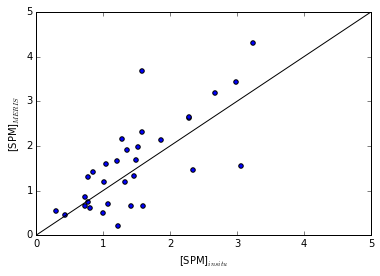

In [25]:
fig, ax = plt.subplots()

x, y = [],[]
for k in results["joined_data"]:
    x.append(results["joined_data"][k]['SPM_insitu'])
    y.append(results["joined_data"][k]['SPM_meris'])
ax.set_xlabel(r"[SPM]$_{insitu}$")   
ax.set_ylabel(r"[SPM]$_{MERIS}$")
ax.set_xlim(0,5)
ax.set_ylim(0,5)  

plt.scatter(x= x, y=y)

l = Line2D([0,5],[0,5],  linestyle="-", color="black")                                    
ax.add_line(l)   

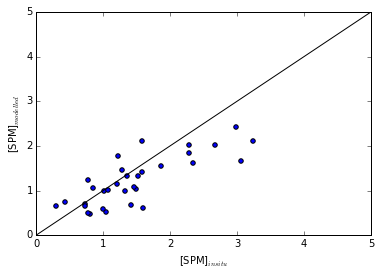

In [26]:
fig, ax = plt.subplots()

x, y = [],[]
for k in results["joined_data"]:
    x.append(results["joined_data"][k]['SPM_insitu'])
    y.append(results["joined_data"][k]['SPM_Nechad_Elinas'])
ax.set_xlabel(r"[SPM]$_{insitu}$")   
ax.set_ylabel(r"[SPM]$_{modelled}$")
ax.set_xlim(0,5)
ax.set_ylim(0,5) 
plt.scatter(x= x, y=y)

l = Line2D([0,5],[0,5],  linestyle="-", color="black")                                    
ax.add_line(l)   


In [27]:
# converting to Pandas Dataframe for easy visualization and easy export of the table
results_df = pd.DataFrame(results["joined_data"])
results_df 

20080709  20080715                      20080718            \
                    BIII_1a     B1_2a     H3_2b     H4_2c     H2_3d     H4_3b   
SPM_Nechad_Elinas  1.034986  1.415085  2.434422  1.657169  0.620277  1.622307   
SPM_insitu         1.490727  1.581727  2.987727  3.060727  1.597727  2.349727   
SPM_meris          1.682824  2.313957  3.443717  1.556786  0.664650  1.455629   
rho_w_06           0.004338  0.006537  0.012127  0.007904  0.001862  0.007709   
turbidity_620      1.168568  1.580912  2.686724  1.843533  0.718678  1.805714   

                             20080724                        ...     20100511  \
                      H5_3a   BIII_4b    BII_4c     BI_4d    ...      BIII_2c   
SPM_Nechad_Elinas  2.100603  1.081144  0.988649  1.055788    ...     0.733750   
SPM_insitu         3.247159  1.469727  1.013727  0.856727    ...     0.437800   
SPM_meris          4.295820  1.331221  1.195183  1.425516    ...     0.453255   
rho_w_06           0.010344  0.004608  0.004065  0.004460    ...     0.002547   
turbidity_620      2.324585  1.218642  1.118300  1.191135    ...     0.841777   

                                       20100518            20100520            \
                     BII_2b     BI_2a    BII_3c     BI_3b     BI_4a   BY31_4d   
SPM_Nechad_Elinas  0.582124  0.660565  0.670321  0.700983  0.524114  0.499442   
SPM_insitu         0.997800  0.300800  1.424533  0.725867  1.051200  0.775867   
SPM_meris          0.492783  0.545675  0.661056  0.862448  1.606968  0.743384   
rho_w_06           0.001630  0.002106  0.002165  0.002350  0.001276  0.001125   
turbidity_620      0.677288  0.762383  0.772967  0.806231  0.614357  0.587592   

                   20100524                      
                      B1_5a     H2_5b     H3_5c  
SPM_Nechad_Elinas  0.483933  0.658884  1.022866  
SPM_insitu         0.813200  0.734978  1.069200  
SPM_meris          0.611101  0.647952  0.698282  
rho_w_06           0.001029  0.002096  0.004266  
turbidity_620      0.570767  0.760560  1.155420  

[5 rows x 32 columns]

In [36]:
#filename = "/home/jobel/Dropbox/ElinasPaper/data_4_elina/Results/MERIS_SPM_vs_Insitu_matchups_"+ windowSize +'x'+windowSize +'_'+processor +'.txt'
#results_df.to_csv(filename, sep="\t")

# Calculating the Mean Normalized Bias and The RMS of the Relative Differences

In [28]:
Math(r'\textbf{MNB}= \textbf{mean} \left[\frac{y_{i}^{MERIS}- x_{i}^{insitu}}{x_{i}^{insitu}} \right] \times 100')

In [29]:
Math(r'\textbf{RMS}_{RD}= \textbf{stdev} \left[\frac{y_{i}^{MERIS}- x_{i}^{insitu}}{x_{i}^{insitu}} \right] \times 100')

## SPM insitu vs SPM calculated via Nechad-Elina

In [30]:
RD = []
for key in results["joined_data"].keys():
    insitu = results["joined_data"][key]['SPM_insitu']
    Meris = results["joined_data"][key]["SPM_Nechad_Elinas"]
    RD.append( (Meris - insitu) / insitu)
MNB = np.array(RD).mean() * 100
RMS = np.array(RD).std() * 100
NOBS = len(RD)
print ("SPM modelled: "+ windowSize +'x'+windowSize +', Processor: '+ processor+ ", MNB: "+ str(MNB)+ ", RMS: "+ str(RMS)+ ", NOBS: "+ str(NOBS))

SPM modelled: 3x3, Processor: MEGS, MNB: -8.04282185732, RMS: 38.19462919, NOBS: 32


In [31]:
RD = []
for key in results["joined_data"].keys():
    insitu = results["joined_data"][key]['SPM_insitu']
    Meris = results["joined_data"][key]["SPM_meris"]
    RD.append( (Meris - insitu) / insitu)
MNB = np.array(RD).mean() * 100
RMS = np.array(RD).std() * 100
NOBS = len(RD)
print ("SPM_MERIS: "+ windowSize +'x'+windowSize +', Processor: '+ processor+ ", MNB: "+ str(MNB)+ ", RMS: "+ str(RMS)+ ", NOBS: "+ str(NOBS))

SPM_MERIS: 3x3, Processor: MEGS, MNB: 11.3337343165, RMS: 46.029668884, NOBS: 32
